## Decision Tree - Classification
- Decision tree breaks down a dataset into smaller and smaller subsets
- The core algorithm for building decision trees is called **ID3** which employs a top-down, greedy search through the space of possible branches with no backtracking.
- ID3 uses **Entropy and Information Gain** to construct a decision tree.

**Entropy**
- ID3 uses entropy to calculate the homogeneity of a sample.
- If the sample is completely homogeneous the entropy is zero
- If the sample is an equally divided it has entropy of one

![alt text](decision.JPG)

**Informatin Gain**
- The information gain is based on the decrease in entropy after a dataset is split on an attribute.
- Constructing a decision tree is all about finding attribute that returns the highest information gain(i.e, the most homogeneous branches)

## Maximizing Information Gain - getting the most bang for the buck

- In order the split the nodes at the most informative features, we need to define an objective function
- The objective function should be optimized via the tree learning algorithm.
$IG(D_{p}, f) = I(D_{p})-\sum_{j=1}^{m}\frac{N_{j}}{N_{p}}(D_{j})$

- **f** is the feature to perform the split
- **$D_{p}$** and **$D_{j}$** are the datasets of the parent and j*th* child node
- **I** is our impurity measure
- **$N_{p}$** is the total number of samples at the parent node
- **$N_{j}$** is the number of samples in the j*th* child node
- The information gain is simply the difference between **The impurity of the parent node** and **the sum of the child node impurities**
- The lower the impurity of the child nodes, the larger the information gain.

#### Binary decision Trees
- Each parent node is split into two child nodes, $D_{left}$ and $D_{right}$: $$IG(D_{p}, a) = I(D_{p})-\frac{N_{left}}{N_{p}}(D_{left})-\frac{N_{right}}{N_{p}}(D_{right})$$
- Three impurities measures or splitting criteria that are commonly used in binary decision trees are:

    - **Gini index($I_{G}$)**
    - **entropy($I_{H}$)**
    - **classification error($I_{E}$)**
    
- Gini index is maximal if the classes are perfectly mixed
- for example, in a binary class setting (c=2):
$$1-\sum_{i=1}^{c}0.5^{2}=0.5$$
- Gini index and entropy yield very similar results
- classification error:
$$I_{E} = 1-max\left \{ p(i\mid t) \right \}$$


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1-(p)) + (1-p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1-np.max([p, 1-p])

In [8]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

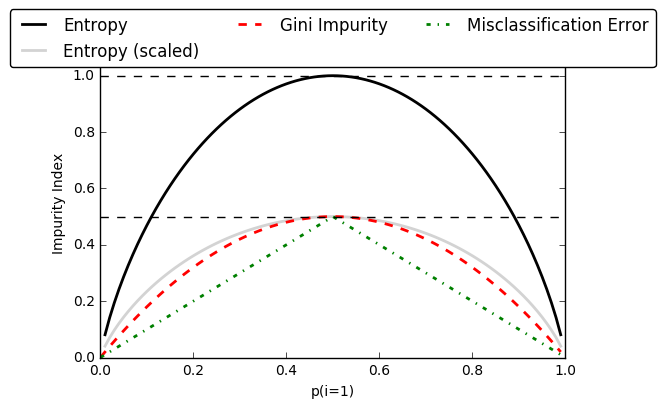

In [9]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 'Gini Impurity',
                         'Misclassification Error'], ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()